In [1]:
# installing and loading the necessary packages
install.packages("rpart.plot")
install.packages("rattle")
install.packages("DT")
install.packages ("rlang")
install.packages("dummies")
install.packages("datasets")
install.packages("rattle.data")
install.packages("e1071")

library(datasets)  
library(caTools) 
library(party) 
library(dplyr) 
library(magrittr)
library(party)
library(rpart.plot)
library(rattle.data)
library(lubridate)
library(DT)
library(scales)
library(tidyverse)
library(knitr)
library(dummies)
library(e1071)
library(caret)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“package ‘datasets’ is not available (for R version 3.6.1)”Warning message:
“package ‘datasets’ is a base package, and should not be updated”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date

In [34]:
# loading csvs
uber <- read.csv("Uber-Jan-Feb-FOIL.csv", header= T) 

In [35]:
head(uber)
dim(uber)

dispatching_base_number,date,active_vehicles,trips
B02512,1/1/2015,190,1132
B02765,1/1/2015,225,1765
B02764,1/1/2015,3427,29421
B02682,1/1/2015,945,7679
B02617,1/1/2015,1228,9537
B02598,1/1/2015,870,6903


[1] 354   4

In [36]:
# checking null values on Uber
sum(is.null(uber))

[1] 0

In [37]:
# Changing format of Date.Time of uber
uber$date <- strptime(uber$date, format = "%m/%d/%Y") 

# New columns are generated/extracted
uber$Day <- as.integer(format(uber$date, "%d"))

uber$Week_day <- as.integer(format(uber$date, "%w"))

uber$month <- factor(month(uber$date, label = TRUE)) 

uber$Particular_Day <- factor(wday(uber$date, label = TRUE))

head(uber)

dispatching_base_number,date,active_vehicles,trips,Day,Week_day,month,Particular_Day
B02512,2015-01-01,190,1132,1,4,Jan,Thu
B02765,2015-01-01,225,1765,1,4,Jan,Thu
B02764,2015-01-01,3427,29421,1,4,Jan,Thu
B02682,2015-01-01,945,7679,1,4,Jan,Thu
B02617,2015-01-01,1228,9537,1,4,Jan,Thu
B02598,2015-01-01,870,6903,1,4,Jan,Thu


In [38]:
# Splitting the hour data to choose random minute pickups out of the 1987 pickups

set.seed(21)
split = sample.split(uber, SplitRatio = 0.75)
training_set = subset(uber, split == TRUE)
test_set = subset(uber, split == FALSE)

In [39]:
dim(training_set)
dim(test_set)

[1] 266   8

[1] 88  8

In [40]:
# Preprocessing before building the SVM model
training_set$dispatching_base_number <- as.factor(training_set$dispatching_base_number)
class(training_set$dispatching_base_number)

training_set$date = as.factor(training_set$date)
class(training_set$date)
head(training_set)

[1] "factor"

[1] "factor"

,dispatching_base_number,date,active_vehicles,trips,Day,Week_day,month,Particular_Day
1,B02512,2015-01-01,190,1132,1,4,Jan,Thu
2,B02765,2015-01-01,225,1765,1,4,Jan,Thu
3,B02764,2015-01-01,3427,29421,1,4,Jan,Thu
4,B02682,2015-01-01,945,7679,1,4,Jan,Thu
7,B02598,2015-01-02,785,4768,2,5,Jan,Fri
8,B02617,2015-01-02,1137,7065,2,5,Jan,Fri



Call:
svm(formula = dispatching_base_number ~ ., data = training_set[c(1, 
    3, 4)], kernel = "radial", cost = 1e+05, gamma = 1, scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 

Number of Support Vectors:  150

 ( 19 23 12 43 23 30 )


Number of Classes:  6 

Levels: 
 B02512 B02598 B02617 B02682 B02764 B02765




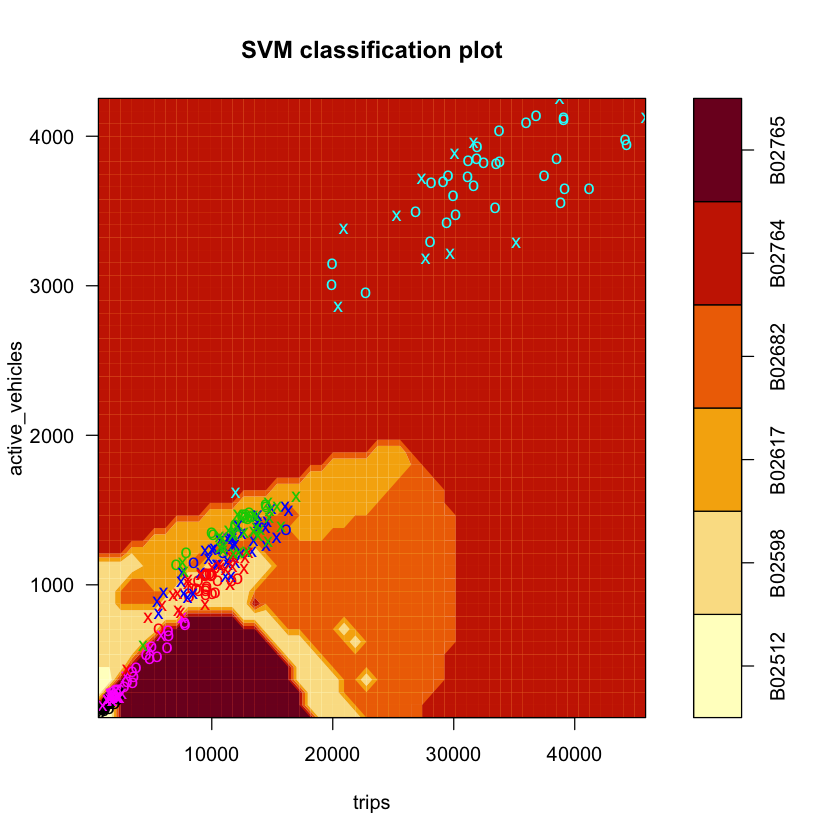

In [53]:
# Building the SVM model
svm_model <- svm(dispatching_base_number ~ ., data=training_set[c(1,3,4)], kernel="radial", cost = 1e5, gamma = 1, scale = TRUE)
summary(svm_model)
plot(svm_model, training_set[c(1,3,4)])

In [54]:
test_set$dispatching_base_number <- as.factor(test_set$dispatching_base_number)
class(test_set$dispatching_base_number)
head(test_set)

[1] "factor"

,dispatching_base_number,date,active_vehicles,trips,Day,Week_day,month,Particular_Day
5,B02617,2015-01-01,1228,9537,1,4,Jan,Thu
6,B02598,2015-01-01,870,6903,1,4,Jan,Thu
13,B02765,2015-01-03,201,1526,3,6,Jan,Sat
14,B02617,2015-01-03,1188,10664,3,6,Jan,Sat
21,B02598,2015-01-04,746,5223,4,0,Jan,Sun
22,B02765,2015-01-04,183,993,4,0,Jan,Sun


In [55]:
# Feeding the test set into the SVM model
test_model = predict(svm_model, newdata = test_set[c(1,3,4)])
summary(test_model)

B02512 B02598 B02617 B02682 B02764 B02765 
    19     19      8     14     15     13

In [56]:
# confusion matrix
confusion_matrix <- table(predict(svm_model),training_set$dispatching_base_number, dnn=c("Prediction","Actual"))
confusionMatrix(confusion_matrix)

Confusion Matrix and Statistics

          Actual
Prediction B02512 B02598 B02617 B02682 B02764 B02765
    B02512     42      0      0      0      0     12
    B02598      0     44      0     13      0      0
    B02617      0      0     26      4      0      0
    B02682      0      1     19     29      0      0
    B02764      0      0      0      0     44      0
    B02765      2      0      0      0      0     30

Overall Statistics
                                          
               Accuracy : 0.8083          
                 95% CI : (0.7557, 0.8538)
    No Information Rate : 0.1729          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7698          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: B02512 Class: B02598 Class: B02617 Class: B02682
Sensitivity                 0.9545        0.9778       0.57778        0.